# Extracting the first five high importance attributes to model the Random Forest.

The maximum acurracy is: 80==>0.6666666666666666
The maximum acurracy is: 480==>0.6666666666666666
MSE: 0.45416666666666666


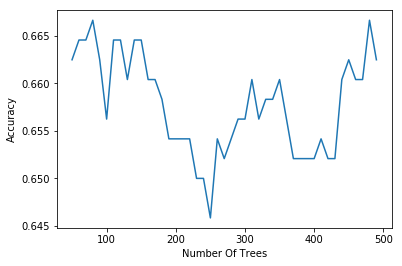

In [2]:
import numpy
import csv
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
import pylab as plot

data1=open("winequality-red.csv")
xlist1 = []
labels1 = []
firstline = True
for line in data1:
    if firstline:
        row=line.strip().split(';')
        firstline = False
    else:
        row=line.strip().split(';')
        labels1.append(float(row[-1]))
        floatrow = [float(row[i]) for i in range(7,11)]
        xlist1.append(floatrow)
x1=numpy.array(xlist1)
y1=numpy.array(labels1)
xtrain1,xtest1,ytrain1,ytest1=train_test_split(x1,y1,test_size=0.30,random_state=531)

ntreelist1=range(50,500,10)
dic1 = {}
accuracy1 = []
mseoos1 = []
for itrees in ntreelist1:
    count=0
    depth=None
    maxfeat=4
    #train the Random Forest model.
    winerandomforestmodel=ensemble.RandomForestClassifier(n_estimators=itrees,max_depth=depth,max_features=maxfeat,oob_score=False,random_state=531)
    winerandomforestmodel.fit(xtrain1,ytrain1)
    #put the prediction accuracy into dictionary.
    prediction=winerandomforestmodel.predict(xtest1)
    for i in range(len(prediction)):
        if prediction[i]==ytest1[i]:
            count += 1
    accuracy1.append((count/len(prediction)))
    dic1[itrees] = count/len(prediction)
    mseoos1.append(mean_squared_error(ytest1,prediction))
for key,value in dic1.items():
    if value == max(dic1.values()):
        print('The maximum acurracy is: '+ str(key) +'==>'+str(value))
print("MSE: " + str(mseoos1[-1]))

plot.plot(ntreelist1,accuracy1)
plot.xlabel("Number Of Trees")
plot.ylabel("Accuracy")
plot.show()